In [2]:
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns 
import pandas as pd
import os # importing os so i can call  files which are for trainig and validation

#importing  Deep learnig Libraries

from keras.preprocessing.image import load_img , img_to_array  
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from keras.optimizers import Adam,SGD,RMSprop

**Displaying Images**

In [3]:
picture_size = 48
folder_path = "../input/face-expression-recognition-dataset/images/"


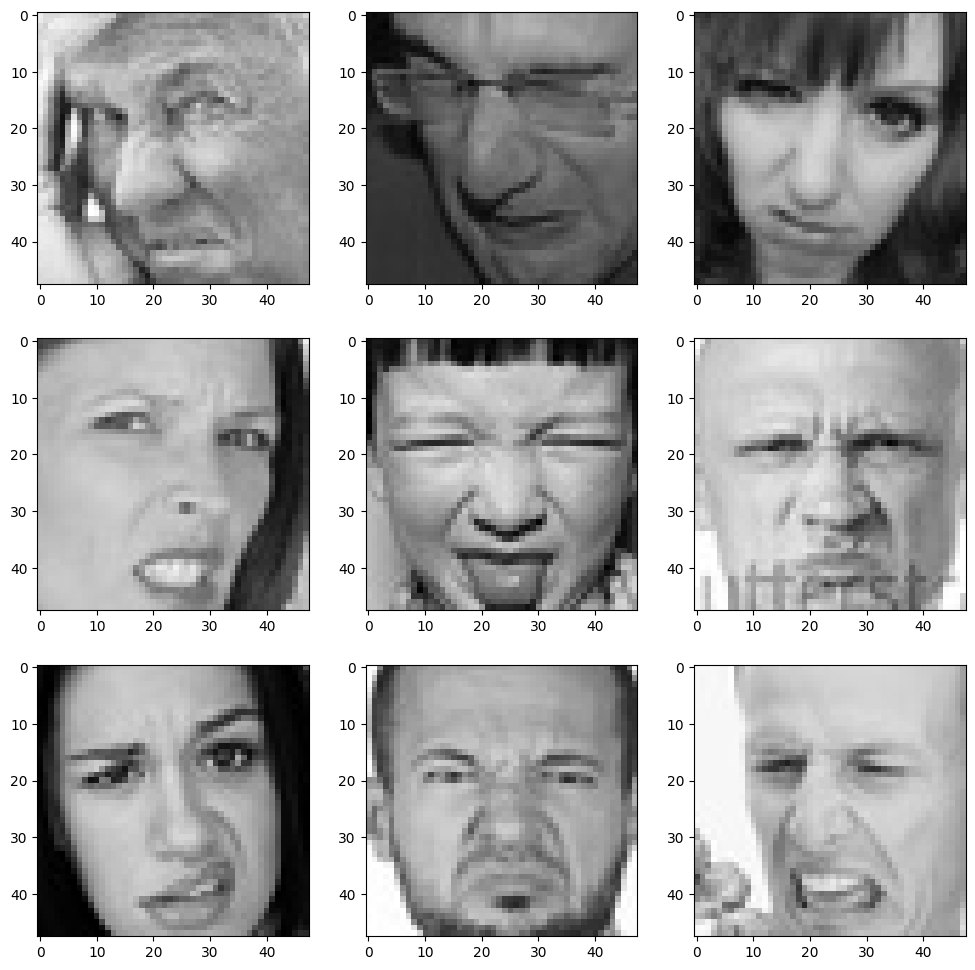

In [15]:
expression = 'disgust'
plt.figure(figsize=(12,12))
for i in range(1,10,1):
    plt.subplot(3,3,i)
    img=load_img(folder_path+"train/"+expression+"/"+
                 os.listdir(folder_path+ "train/" +expression)[i],target_size=(picture_size,picture_size))
    plt.imshow(img)
    
plt.show()





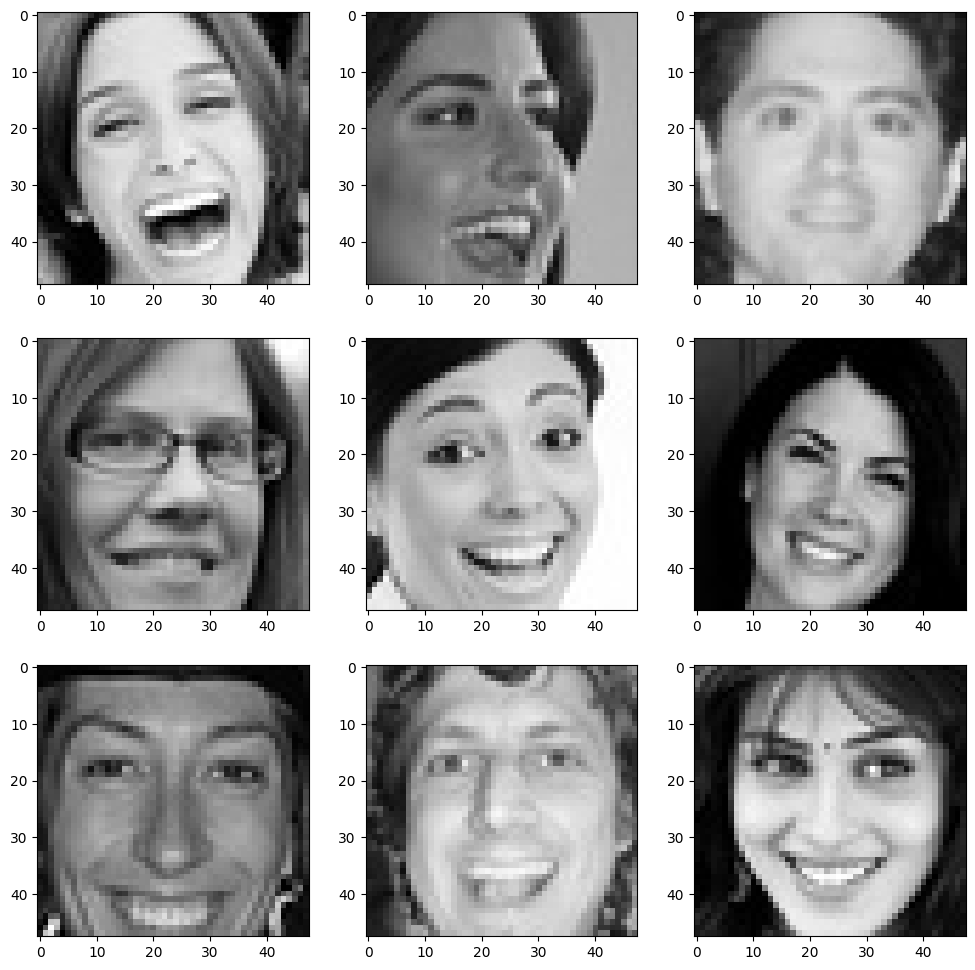

In [6]:
expression = 'happy'
plt.figure(figsize=(12,12))
for i in range(1,10,1):
    plt.subplot(3,3,i)
    img=load_img(folder_path+"train/"+expression+"/"+
                 os.listdir(folder_path+ "train/" +expression)[i],target_size=(picture_size,picture_size))
    plt.imshow(img)
    
plt.show()

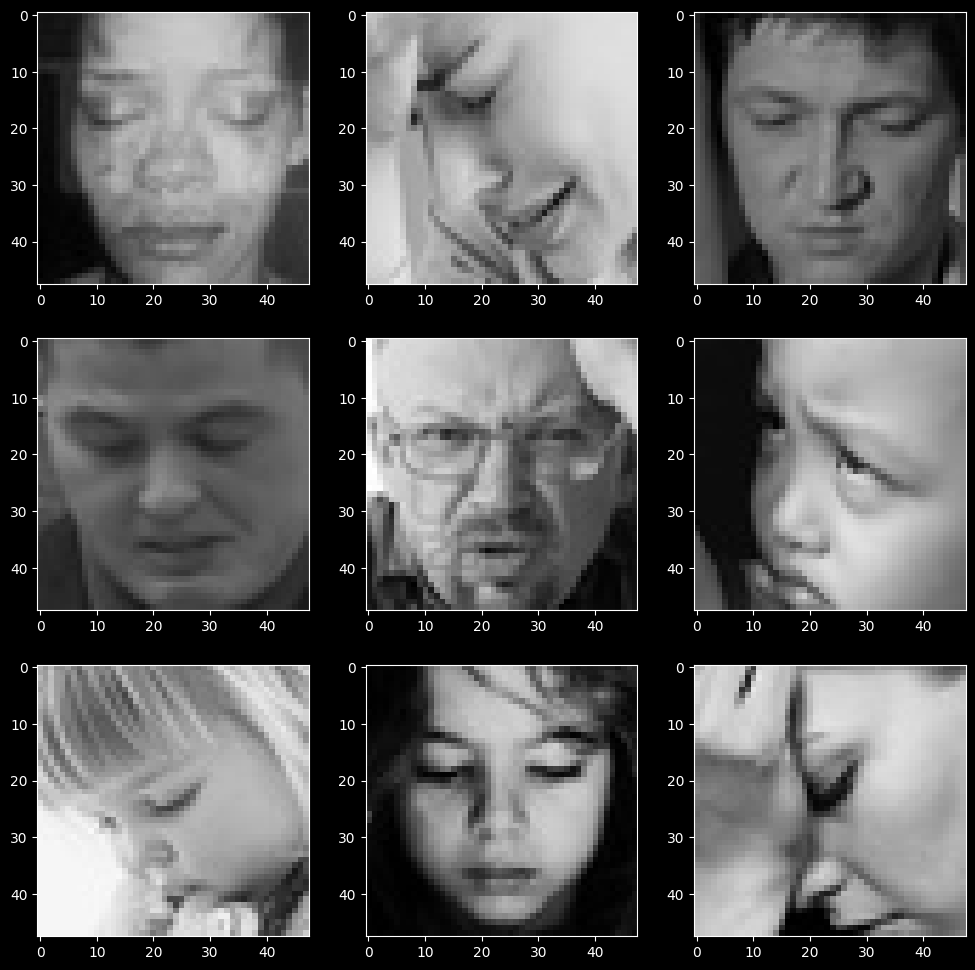

In [10]:
expression = 'sad'
plt.style.use('dark_background')
plt.figure(figsize=(12,12))
for i in range(1,10,1):
    plt.subplot(3,3,i)
    img=load_img(folder_path+"train/"+expression+"/"+
                 os.listdir(folder_path+ "train/" +expression)[i],target_size=(picture_size,picture_size))
    plt.imshow(img)
    
plt.show()

**Making Training and Validation Data**

In [5]:
batch_size=128 #how many training example your model will take in one iteration

datagen_train=ImageDataGenerator()#obj of ImagedataGenratos
datagen_val=ImageDataGenerator()#obj of ImagedataGenratos

#(train_set & test_set) this varible contain data which is coming from a directry 
train_set=datagen_train.flow_from_directory(folder_path+"train",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',# because 7 diff. category like sad/happy / ..
                                              shuffle=True)

test_set = datagen_val.flow_from_directory(folder_path+"validation",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=False)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


# Model Building

In [17]:
#Model Building
no_of_classes = 7

model = Sequential()
#1st CNN layer
model.add(Conv2D(64,(3,3),padding='same',input_shape=(48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#2nd CNN layer
model.add(Conv2D(128,(5,5),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#3rd CNN layer
model.add(Conv2D(512,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

#Fully connected 1st Layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

#Fully connected 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes,activation = 'softmax'))

opt = Adam(lr=0.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 48, 48, 64)        640       
                                                                 
 batch_normalization_63 (Ba  (None, 48, 48, 64)        256       
 tchNormalization)                                               
                                                                 
 activation_54 (Activation)  (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d_36 (MaxPooli  (None, 24, 24, 64)        0         
 ng2D)                                                           
                                                                 
 dropout_54 (Dropout)        (None, 24, 24, 64)        0         
                                                                 
 conv2d_37 (Conv2D)          (None, 24, 24, 128)      

# Fitting the Model with Training and Validation Data

In [18]:
from keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau
checkpoint = ModelCheckpoint("./model.h5", monitor='val_acc',verbose=1,save_best_only=True,mode='max')

early_stopping = EarlyStopping(monitor='val_loss',min_delta=0,patience=3,verbose=1,restore_best_weights=True)

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',factor=0.2,patience=3,verbose=1,min_delta=0.0001)

callbacks_list=[checkpoint,early_stopping,reduce_learningrate]
epochs = 48


In [19]:
history = model.fit_generator(generator=train_set,
                              steps_per_epoch=train_set.n//train_set.batch_size,
                              epochs=epochs,
                              validation_data=test_set,
                              validation_steps = test_set.n//test_set.batch_size,
                              callbacks=callbacks_list)

/tmp/ipykernel_43/78281156.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_set,


Epoch 1/48
225/225 [==============================] - 822s 4s/step - loss: 1.7818 - accuracy: 0.3168 - val_loss: 1.5640 - val_accuracy: 0.4244 - lr: 0.0010
Epoch 2/48
225/225 [==============================] - 800s 4s/step - loss: 1.4282 - accuracy: 0.4515 - val_loss: 1.4680 - val_accuracy: 0.4690 - lr: 0.0010
Epoch 3/48
225/225 [==============================] - 762s 3s/step - loss: 1.2761 - accuracy: 0.5105 - val_loss: 1.3052 - val_accuracy: 0.5036 - lr: 0.0010
Epoch 4/48
225/225 [==============================] - 762s 3s/step - loss: 1.1871 - accuracy: 0.5468 - val_loss: 1.3122 - val_accuracy: 0.5038 - lr: 0.0010
Epoch 5/48
225/225 [==============================] - 797s 4s/step - loss: 1.1197 - accuracy: 0.5725 - val_loss: 1.1432 - val_accuracy: 0.5722 - lr: 0.0010
Epoch 6/48
225/225 [==============================] - 796s 4s/step - loss: 1.0750 - accuracy: 0.5901 - val_loss: 1.1515 - val_accuracy: 0.5736 - lr: 0.0010
Epoch 7/48
225/225 [==============================] - 794s 4s/st

# Plotting Accuracy & Loss

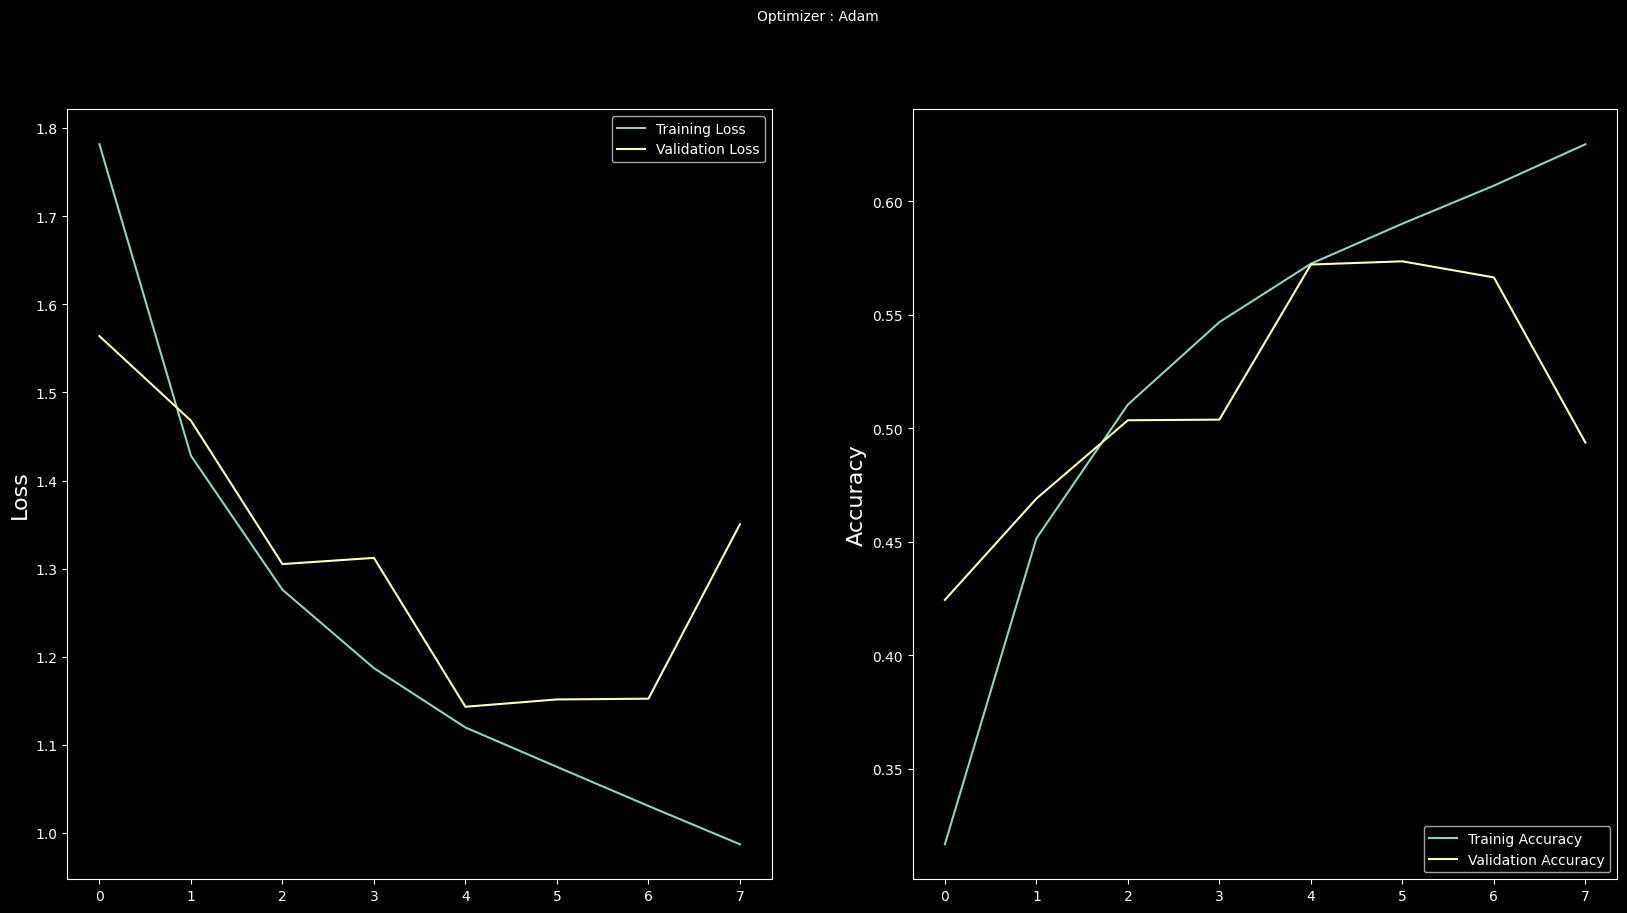

In [20]:
plt.style.use('dark_background')

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.suptitle('Optimizer : Adam', fontsize = 10)
plt.ylabel('Loss',fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1,2,2)
plt.ylabel('Accuracy',fontsize=16)
plt.plot(history.history['accuracy'],label='Trainig Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()